# Linear regression source: https://www.youtube.com/watch?v=o7VCeCxHCTI&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4&index=3

In [1]:
import numpy as np

height = [60, 62, 65, 68, 70, 74]
weight = [140, 138, 150, 166, 190, 250]

print(np.corrcoef(height, weight))
print('') # print a line break
# print only the r rather than the whole matrix; round to 2 decimals
print(round(np.corrcoef(height, weight)[0][1], 2)) 

[[1.         0.92989745]
 [0.92989745 1.        ]]

0.93


In [2]:
# Don't forget to connect Google Drive if needed:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd
df = pd.read_excel('C:\\Users\\diego\\Desktop\\python\\Superprof_Students\\John\\2_House_Repair_Cost.xlsx')
df = df[['Capitalised_major_repairs', 'Major_repairs_expenditure', 'Routine_maintenance_spend', 'Planned_maintenance_spend']]
df.corr()

,Capitalised_major_repairs,Major_repairs_expenditure,Routine_maintenance_spend,Planned_maintenance_spend
Capitalised_major_repairs,1.000000,0.309684,0.809445,0.799712
Major_repairs_expenditure,0.309684,1.000000,0.469605,0.337209
Routine_maintenance_spend,0.809445,0.469605,1.000000,0.813324
Planned_maintenance_spend,0.799712,0.337209,0.813324,1.000000


In [3]:
df.Capitalised_major_repairs.corr(df.Planned_maintenance_spend)

0.7997123997421328

## Correlation in SciPy

In [4]:
from scipy import stats

corr = stats.pearsonr(df.Capitalised_major_repairs, df.Planned_maintenance_spend)
corr

PearsonRResult(statistic=0.7997123997421328, pvalue=1.5191651280916335e-59)

In [5]:
print('r: \t' + str(round(corr[0], 4))) 
print('This means thats is extremely likely that will see a correlation if we collect more samples')
print('p-value:' + str(round(corr[1], 59)))
print('The P results means that is very unlikely that we wont that number again')

r: 	0.7997
This means thats is extremely likely that will see a correlation if we collect more samples
p-value:2e-59
The P results means that is very unlikely that we wont that number again


In [6]:
# Create an empty DataFrame to store the correlations and p-values
corr_df = pd.DataFrame(columns=['r', 'p-value'])

for col in df:                                    # Use this to loop through the insurance.csv DataFrame
  if pd.api.types.is_numeric_dtype(df[col]) and col != 'Planned_maintenance_spend':      # Only calculate r, p-value for the numeric columns
    r, p = stats.pearsonr(df.Planned_maintenance_spend, df[col])    # .pearsonr() returns two values in a list, store them individually using this format
    corr_df.loc[col] = [round(r, 3), round(p, 3)] # Add the r & p for this col into the corr_df

corr_df.sort_values(by=['r'], ascending=False)    # Sort and display the corr_df

,r,p-value
Routine_maintenance_spend,0.813,0.0
Capitalised_major_repairs,0.800,0.0
Major_repairs_expenditure,0.337,0.0


# Get the data type columns:

In [7]:
def bivariate_stats(df, label):
  corr_df = pd.DataFrame(columns=['r', 'p-value'])
  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) and col != label:
      r, p = stats.pearsonr(df[label], df[col])
      corr_df.loc[col] = [round(r, 3), round(p, 3)]

  return corr_df.sort_values(by=['r'], ascending=False)

In [8]:
bivariate_stats(df, 'Planned_maintenance_spend')

,r,p-value
Routine_maintenance_spend,0.813,0.0
Capitalised_major_repairs,0.800,0.0
Major_repairs_expenditure,0.337,0.0


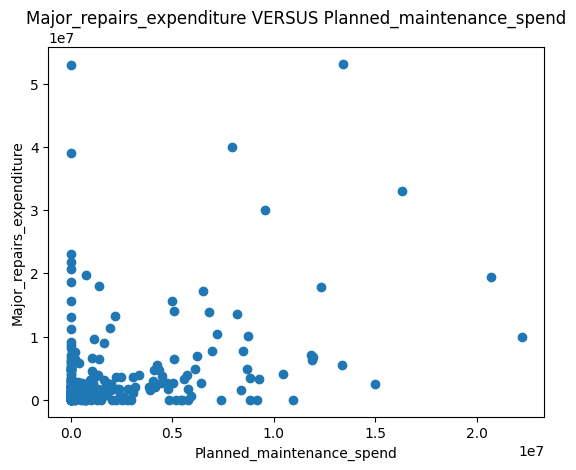

In [9]:
import  matplotlib.pyplot as plt
plt.scatter( df.Major_repairs_expenditure, df.Planned_maintenance_spend)
plt.title('Major_repairs_expenditure VERSUS Planned_maintenance_spend')
plt.xlabel('Planned_maintenance_spend')
plt.ylabel('Major_repairs_expenditure')
plt.show()

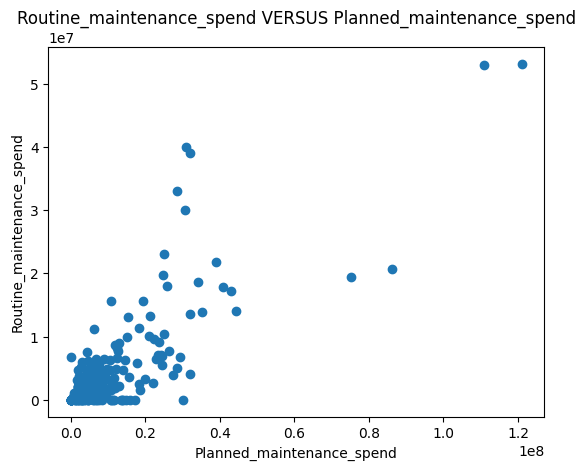

In [10]:
plt.scatter(df.Routine_maintenance_spend, df.Planned_maintenance_spend)
plt.title('Routine_maintenance_spend VERSUS Planned_maintenance_spend')
plt.xlabel('Planned_maintenance_spend')
plt.ylabel('Routine_maintenance_spend')
plt.show()

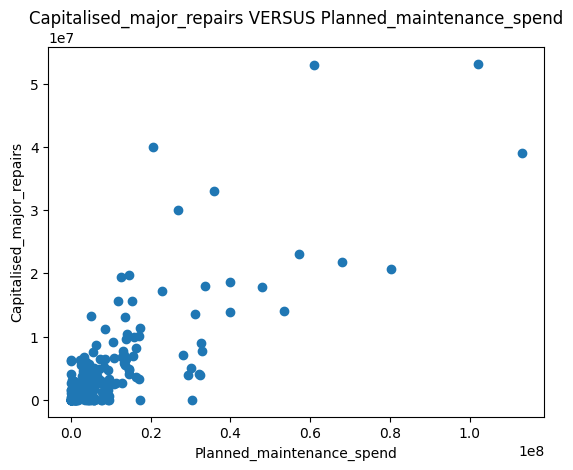

In [11]:
plt.scatter(df.Capitalised_major_repairs, df.Planned_maintenance_spend)
plt.title('Capitalised_major_repairs VERSUS Planned_maintenance_spend')
plt.xlabel('Planned_maintenance_spend')
plt.ylabel('Capitalised_major_repairs')
plt.show()